### Titanic Python Exercise

Work book for submission to Decoded Data Fellowship to preeict survical outcome based on gender and Pclass

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Read dataset
test = pd.read_csv("test.csv")

In [70]:
# EDA | Generate crosstab to review the dataset
pd.crosstab(test.Sex, test.Pclass, normalize=False, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,50,30,72,152
male,57,63,146,266
All,107,93,218,418


In [71]:
# add a column and set intial values
test['ModelPrediction'] = 0

In [72]:
# assign prediction for females = survived, unless travelling in Pclass = 3 | all males under 18 in PClass 1,2
test.loc[test['Sex'] == "female", 'ModelPrediction'] = 1
test.loc[test['Pclass'] == 3, 'ModelPrediction'] = 0
test.loc[((test['Pclass'] == 1) | (test['Pclass'] == 2)) & (test['Sex'] == "male") & (test.Age < 18), 'ModelPrediction'] = 1

In [73]:
# review results
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ModelPrediction
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [74]:
# calculate predicted survival outcome
sum(test.ModelPrediction == 1) / test.shape[0] #shape counts the number of rows in the dataset

0.20813397129186603

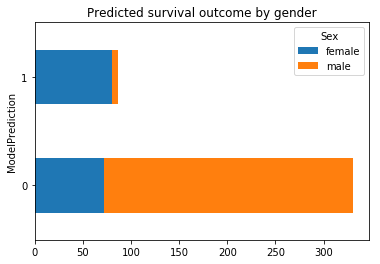

In [75]:
# generate  bar chart showing predicted survival outcome
test.groupby(['ModelPrediction', 'Sex']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Predicted survival outcome by gender')
plt.show()

In [76]:
# Create a new data frame for the output
submission = test.filter(['PassengerId', 'ModelPrediction'])
submission.head()

,PassengerId,ModelPrediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [77]:
# Create the csv file output
submission.to_csv('titanic_in_python_submission.csv', index=False)

End of Notebook